In [1]:
#Import the required libraries
import pandas as pd
import os
from os.path import curdir
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

#Import Data from Excel file
data_path = os.path.join(os.curdir,'Data','MusicData.xlsx')
Musicdata = pd.read_excel(data_path)
Musicdata.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


In [2]:
Musicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7574 non-null   int64  
 1   songtitle                 7574 non-null   object 
 2   artistname                7574 non-null   object 
 3   songID                    7574 non-null   object 
 4   artistID                  7574 non-null   object 
 5   timesignature             7574 non-null   int64  
 6   timesignature_confidence  7574 non-null   float64
 7   loudness                  7574 non-null   float64
 8   tempo                     7574 non-null   float64
 9   tempo_confidence          7574 non-null   float64
 10  key                       7574 non-null   int64  
 11  key_confidence            7574 non-null   float64
 12  energy                    7574 non-null   float64
 13  pitch                     7574 non-null   float64
 14  timbre_0

In [4]:
MusicdatawithID = Musicdata.drop(columns=['songtitle','artistname','artistID'])

In [5]:
# Drop object variables 
Musicdata= Musicdata.drop(columns=['songID','artistID','songtitle','artistname'])
Musicdata.head()

,year,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,3,0.853,-4.262,91.525,0.953,11,0.453,0.966656,0.024,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,4,1.000,-4.051,140.048,0.921,10,0.469,0.984710,0.025,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,4,1.000,-3.571,160.512,0.489,2,0.209,0.989900,0.026,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,4,1.000,-3.815,97.525,0.794,1,0.632,0.939207,0.013,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,4,0.788,-4.707,140.053,0.286,6,0.483,0.987738,0.063,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


In [6]:
Musicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7574 non-null   int64  
 1   timesignature             7574 non-null   int64  
 2   timesignature_confidence  7574 non-null   float64
 3   loudness                  7574 non-null   float64
 4   tempo                     7574 non-null   float64
 5   tempo_confidence          7574 non-null   float64
 6   key                       7574 non-null   int64  
 7   key_confidence            7574 non-null   float64
 8   energy                    7574 non-null   float64
 9   pitch                     7574 non-null   float64
 10  timbre_0_min              7574 non-null   float64
 11  timbre_0_max              7574 non-null   float64
 12  timbre_1_min              7574 non-null   float64
 13  timbre_1_max              7574 non-null   float64
 14  timbre_2

## 1. Fit a logistic regression model using all variables

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Filter data before and after 2009
SongsTrain = Musicdata[Musicdata['year'] <= 2009]
SongsTest = Musicdata[Musicdata['year'] == 2010 ]
SongsTestwithID = MusicdatawithID[MusicdatawithID['year'] == 2010 ]

# Split into features and target variables
X_train = SongsTrain.drop(['Top10'], axis=1)
y_train = SongsTrain['Top10']
X_test = SongsTest.drop(['Top10'], axis=1)
y_test = SongsTest['Top10']

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
# Create a logistic regression model
model = Logit(y_train, X_train)

# Fit the model to the data
results = model.fit()

# Print the summary of the model
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.331692
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7167
Method:                           MLE   Df Model:                           33
Date:                Sun, 14 May 2023   Pseudo R-squ.:                  0.2061
Time:                        16:12:34   Log-Likelihood:                -2388.5
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                1.634e-239
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
year                         0.0062      0.001      7.022      0.000       0.004

## 2.Predict the popularity of records in the testing set.

In [9]:
import statsmodels.api as sm
# Fit the logistic regression model using Logit
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Make predictions on the test set
y_pred_proba = result.predict(X_test)

# Binarize the predicted probabilities to create predicted labels
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)

Optimization terminated successfully.
         Current function value: 0.331692
         Iterations 8


In [10]:
print(y_pred)

0      0
1      0
2      0
3      0
4      0
      ..
368    0
369    0
370    0
371    0
372    1
Length: 373, dtype: int32


In [12]:
#store ID for prediction
ID = SongsTestwithID['songID']
ID.to_csv('ID.csv', index=False)

In [13]:
popularity = pd.DataFrame(ID,columns=['songID'])
popularity['Top10_Predict'] = y_pred
popularity.to_csv('popularity.csv', index=False)

In [14]:
print(popularity)

                 songID  Top10_Predict
0    SOBGGAB12C5664F054              0
1    SOPAQHU1315CD47F31              0
2    SOOIZOU1376E7C6386              0
3    SODRYWD1315CD49DBE              0
4    SOICMQB1315CD46EE3              0
..                  ...            ...
368  SOQNGML13DC8B9A8A5              0
369  SOXGDEA1375A1AD2F8              0
370  SOEHNSK13DC4A18344              0
371  SOQOCRO13DC469AD34              0
372  SOPQHEH1374011CFB8              1

[373 rows x 2 columns]


## 3.Generate the ROC curve

In [15]:
# Print the confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[311   3]
 [ 48  11]]


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8632707774798928


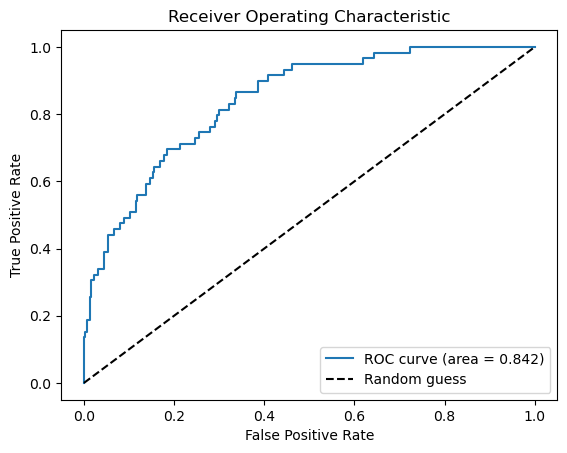

In [17]:
# Calculate the false positive rate and true positive rate at various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()